In [115]:
# import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', 50)

In [116]:
# load data from csv to dataframe
burritos_df = pd.read_csv('burritos_01022018.csv')

In [117]:
# make a copy of the dataframe
df = burritos_df.copy()
#df.head()

# I. DATA PREPROCESSING

In [118]:
"""
   Returns a table containing pourcentage of missing values in a dataframe 
"""
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(df)


Your selected dataframe has 66 columns and 385 Rows.
There are 62 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Queso,0,385,100.0,385,100.0,float64
Zucchini,0,384,99.7,384,99.7,object
Lobster,0,384,99.7,384,99.7,object
Carrots,0,384,99.7,384,99.7,object
Ham,0,384,99.7,384,99.7,object
...,...,...,...,...,...,...
Fillings,0,2,0.5,2,0.5,float64
Wrap,1,2,0.5,3,0.8,float64
overall,0,2,0.5,2,0.5,float64
Uniformity,1,2,0.5,3,0.8,float64


### 1. Drop NonSD, Mass (g) and Density (g/mL) columns because they have more than 90% of missing values


In [119]:
df.drop(['NonSD','Mass (g)','Density (g/mL)'], axis=1, inplace=True)

### 2. Replace crosses with 1 and nan values with 0

In [120]:
# Replacing cross with 1 and none with 0
columns_with_cross_to_update = ['Unreliable', 'Chips', 'Beef', 'Pico', 'Guac', 'Cheese', 'Fries', 'Sour cream', 'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice', 'Beans', 'Lettuce', 'Tomato', 'Bell peper', 'Carrots', 'Cabbage', 'Sauce', 'Salsa.1', 'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Ham', 'Chile relleno', 'Nopales', 'Lobster', 'Egg','Queso', 'Mushroom', 'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini']
df[columns_with_cross_to_update] = df[columns_with_cross_to_update].fillna(0)
df[columns_with_cross_to_update] = df[columns_with_cross_to_update].replace({'x':1}).replace({'X':1})

### 3. Recommandation column enconding (Rec):
* Replace yes with 1 and no values with 0

In [121]:
# Encoding Rec with 1/0
df['Rec'] = df[df['Rec'].notnull()]['Rec'].apply(lambda x: x[:-1] if x.endswith(' ') or x.endswith('.') else x)
df['Rec'] = df[df['Rec'].notnull()]['Rec'].str.lower()
df['Rec'] = df[df['Rec'].notnull()]['Rec'].replace({'yes': 1}).replace({'no': 0})

### 4. Location column Preprocessing:
* lowercase each location name 
* Delete whitespaces and dots at the end of each location name 

In [122]:
df['Location'] = df['Location'].str.lower()
df['Location'] = df['Location'].apply(lambda x: x[:-1] if x.endswith(' ') or x.endswith('.') else x)

### 5. Replace few missing numeric values by mean value of the column


In [123]:
columns_to_fill_by_mean_list = ['Salsa', 'Meat', 'Cost', 'Temp', 'Meat:filling','Hunger', 'Length', 'Circum', 'Volume', 'Synergy', 'Wrap']
for column in columns_to_fill_by_mean_list:
    df[column].fillna((df[column].mean()), inplace=True)
#df.head()

### 6. Fill Google and Yelp columns missing values
#### 6.1. We notice that 88% of locations have Google and Yelp Ratings

In [124]:
# Number of unique locations
number_of_locations = len(df['Location'].value_counts())
locations_with_google_and_yelp_ratings = len(df[(df['Google'].notnull()) & (df['Yelp'].notnull())]['Location'].value_counts())
locations_without_google_and_yelp_ratings = number_of_locations - locations_with_google_and_yelp_ratings
print('Number of unique locations = ' + str(number_of_locations))
print('Number of unique locations that have Google and Yelp ratings = ' + str(locations_with_google_and_yelp_ratings))
print('Number of locations that does not have google and Yelp ratings = ' + str(locations_without_google_and_yelp_ratings) )
print('% of locations that does not have google and Yelp ratings = ' + str(int(round(locations_without_google_and_yelp_ratings/93,2)*100)) + '%' )

Number of unique locations = 93
Number of unique locations that have Google and Yelp ratings = 82
Number of locations that does not have google and Yelp ratings = 11
% of locations that does not have google and Yelp ratings = 12%


In [125]:
missing_zero_values_table(df)

Your selected dataframe has 63 columns and 385 Rows.
There are 11 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
URL,0,303,78.7,303,78.7,object
Yelp,0,303,78.7,303,78.7,float64
Google,0,303,78.7,303,78.7,float64
Address,0,302,78.4,302,78.4,object
Neighborhood,0,298,77.4,298,77.4,object
Notes,0,256,66.5,256,66.5,object
Rec,67,157,40.8,224,58.2,float64
Fillings,0,2,0.5,2,0.5,float64
Uniformity,1,2,0.5,3,0.8,float64
overall,0,2,0.5,2,0.5,float64


#### 6.2. Fill missing address, neighborhood, url, google and yelp values with the existing value for the same location

In [126]:
unique_locations_dict = {}
for index, row in df[df['Neighborhood'].notnull() & df['Address'].notnull() & df['URL'].notnull() & df['Google'].notnull() & df['Yelp'].notnull()].iterrows():
    unique_locations_dict[row['Location']] = {
        'Neighborhood': row['Neighborhood'],
        'Address': row['Address'],
        'URL': row['URL'],
        'Google': row['Google'],
        'Yelp': row['Yelp']
    }
i = 0
for i in range(len(df)):
    if (pd.isnull(df['Neighborhood'].values[i]) and pd.isnull(df['Address'].values[i]) and pd.isnull(df['URL'].values[i]) and pd.isnull(df['Google'].values[i]) and pd.isnull(df['Yelp'].values[i])):
        if df['Location'].values[i] in unique_locations_dict:
            df['Neighborhood'].values[i] = unique_locations_dict[df['Location'].values[i]]['Neighborhood']
            df['Address'].values[i] = unique_locations_dict[df['Location'].values[i]]['Address']
            df['Google'].values[i] = unique_locations_dict[df['Location'].values[i]]['Google']
            df['URL'].values[i] = unique_locations_dict[df['Location'].values[i]]['URL']
            df['Yelp'].values[i] = unique_locations_dict[df['Location'].values[i]]['Yelp']

In [127]:
missing_zero_values_table(df)

Your selected dataframe has 63 columns and 385 Rows.
There are 11 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Notes,0,256,66.5,256,66.5,object
Rec,67,157,40.8,224,58.2,float64
URL,0,13,3.4,13,3.4,object
Yelp,0,13,3.4,13,3.4,float64
Google,0,13,3.4,13,3.4,float64
Address,0,12,3.1,12,3.1,object
Neighborhood,0,8,2.1,8,2.1,object
Fillings,0,2,0.5,2,0.5,float64
Uniformity,1,2,0.5,3,0.8,float64
overall,0,2,0.5,2,0.5,float64


# II. DATA ANALYSIS

### 1. Best rated location which at least have 9 or more Reviews

In [128]:
x = df.groupby('Location').size().reset_index()
temp = x.sort_values(ascending=False, by=0)
temp

,Location,0
7,california burritos,29
53,lucha libre north park,28
72,rigoberto's taco shop,24
84,taco stand,24
87,taco villa,20
...,...,...
22,el pollo loco,1
24,el pueblo mexican food,1
35,jose's taco,1
70,"qdoba mexican grill, seatac airport",1


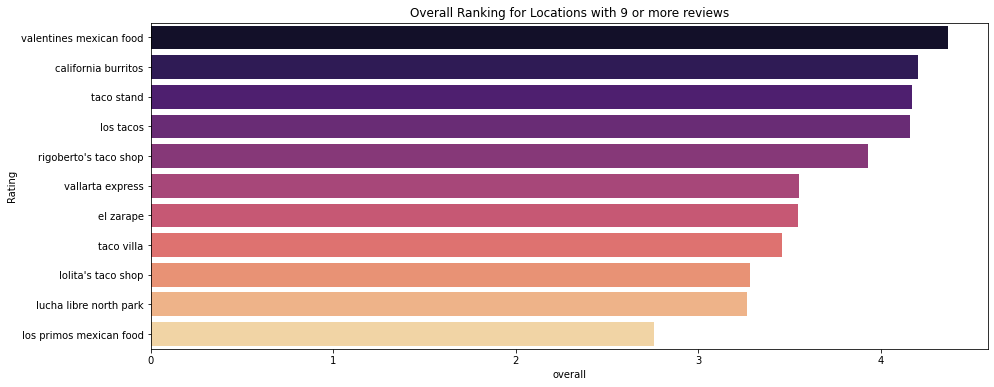

In [129]:
temp = temp[temp[0]>=9]
y = pd.DataFrame()
for name in temp['Location']:
    y = y.append(df[(df['Location']==name)])
x = y.groupby('Location').mean().reset_index()
x = x.sort_values(by = 'overall', ascending=False)
plt.rcParams['figure.figsize'] = (15.0, 6.0)
ax = sns.barplot(x = x['overall'], y = x['Location'], palette='magma')
ax.set_ylabel('Rating')
ax = ax.set_title('Overall Ranking for Locations with 9 or more reviews')


In [130]:
x = x.sort_values(by = ['overall','Cost'], ascending=[False,True])
x[['Location', 'overall', 'Cost']]

,Location,overall,Cost
9,valentines mexican food,4.366667,7.644444
0,california burritos,4.203704,6.317241
7,taco stand,4.170833,7.630417
4,los tacos,4.157143,8.071429
6,rigoberto's taco shop,3.927083,6.770762
10,vallarta express,3.553846,7.276923
1,el zarape,3.548148,6.694444
8,taco villa,3.460000,6.347656
2,lolita's taco shop,3.283333,7.225000
5,lucha libre north park,3.264286,7.587500


In [131]:
### 4. Check if the best and worst locations according to the overall are also best and worst location according individual features

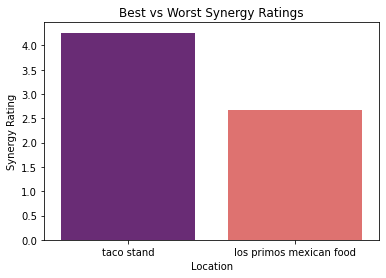

In [132]:
temp = y.groupby('Location').mean().reset_index()

plt.rcParams['figure.figsize'] = (6.0, 4.0)
x = temp.sort_values(by = 'Synergy', ascending=False)
x = x[['Location', 'Synergy']]
x = x.iloc[[0,-1]]
ax = sns.barplot(x = 'Location', y = 'Synergy', data = x, palette = 'magma')
ax.set_ylabel('Synergy Rating')
ax = ax.set_title('Best vs Worst Synergy Ratings')


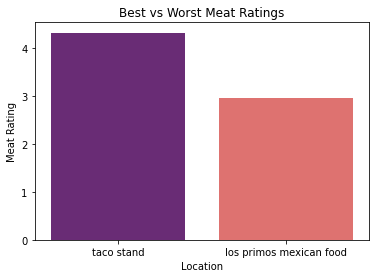

In [133]:
x = temp.sort_values(by = 'Meat', ascending=False)
x = x[['Location', 'Meat']]
x = x.iloc[[0,-1]]
ax = sns.barplot(x = 'Location', y = 'Meat', data = x, palette = 'magma')
ax.set_ylabel('Meat Rating')
ax = ax.set_title('Best vs Worst Meat Ratings')


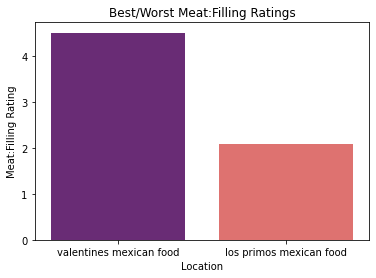

In [134]:
x = temp.sort_values(by = 'Meat:filling', ascending=False)
x = x[['Location', 'Meat:filling']]
x = x.iloc[[0,-1]]
ax = sns.barplot(x = 'Location', y = 'Meat:filling', data = x, palette = 'magma')
ax.set_ylabel('Meat:Filling Rating')
ax = ax.set_title('Best/Worst Meat:Filling Ratings')


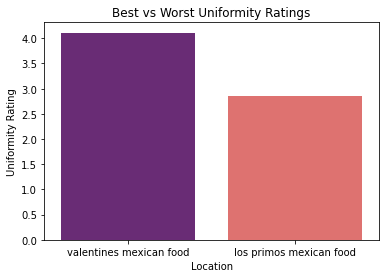

In [135]:
x = temp.sort_values(by = 'Uniformity', ascending=False)
x = x[['Location', 'Uniformity']]
x = x.iloc[[0,-1]]
ax = sns.barplot(x = 'Location', y = 'Uniformity', data = x, palette = 'magma')
ax.set_ylabel('Uniformity Rating')
ax = ax.set_title('Best vs Worst Uniformity Ratings')


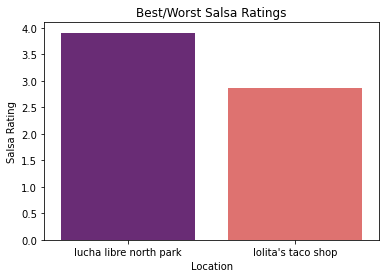

In [136]:
x = temp.sort_values(by = 'Salsa', ascending=False)
x = x[['Location', 'Salsa']]
x = x.iloc[[0,-1]]
ax = sns.barplot(x = 'Location', y = 'Salsa', data = x, palette = 'magma')
ax.set_ylabel('Salsa Rating')
ax = ax.set_title('Best/Worst Salsa Ratings')


##### There is no consistency to determine which is the best location

### 2. Most important features that affect the overall rating
##### Features to analyze : 
* Cost
* Volume
* Circum
* Length
* Tortilla
* Temp
* Meat
* Fillings
* Meat:filling
* Uniformity
* Salsa
* Synergy
* Wrap
* Hunger
* overall

In [137]:
features_to_analyze = ['Location', 'Burrito', 'Cost', 'Volume', 'Circum','Length', 'Tortilla', 'Temp', 'Meat', 'Fillings', 'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap','Hunger', 'overall']
df_to_analyze = df[features_to_analyze]
df_to_analyze.head()


,Location,Burrito,Cost,Volume,Circum,Length,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Hunger,overall
0,donato's taco shop,California,6.49,0.785462,22.098996,20.072988,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,3.0,3.80
1,oscar's mexican food,California,5.45,0.785462,22.098996,20.072988,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,3.5,3.00
2,oscar's mexican food,Carnitas,4.85,0.785462,22.098996,20.072988,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,1.5,3.00
3,oscar's mexican food,Carne asada,5.25,0.785462,22.098996,20.072988,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,2.0,3.75
4,pollos maria,California,6.59,0.785462,22.098996,20.072988,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,4.0,4.20


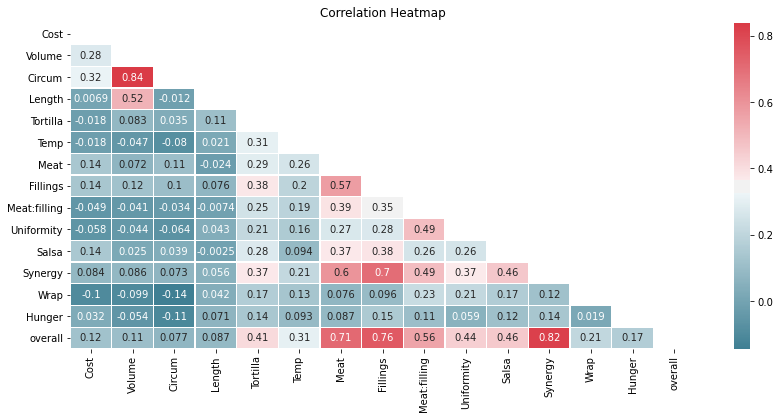

In [138]:
plt.figure(figsize=(14,6))

corr = df_to_analyze.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(corr, mask=mask, cmap = cmap, linewidths= 0.25, annot=True)
ax = ax.set_title('Correlation Heatmap')


##### The most 3 important features that affect the overall are : 
* Synergy (0.82)
* Fillings (0.76)
* Meat (0.71)

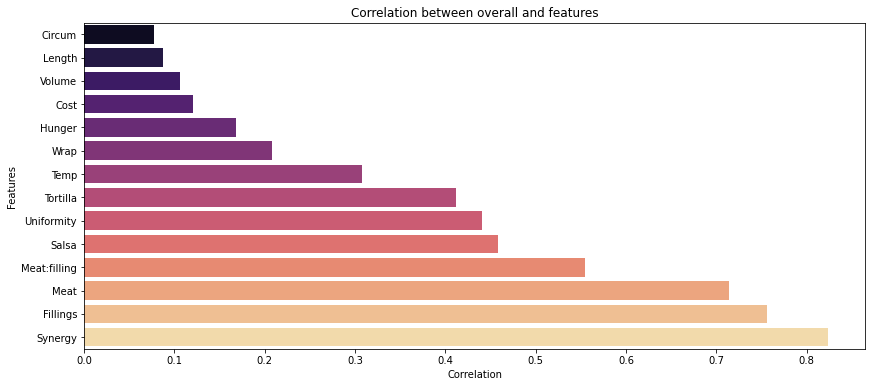

In [139]:
plt.figure(figsize=(14,6))

corr = df_to_analyze.corr()['overall'].reset_index()
corr = corr.sort_values(by = 'overall')[:(len(corr)-1)]
ax = sns.barplot(y = corr['index'], x = corr['overall'], palette='magma')
ax.set_xlabel('Correlation')
ax.set_ylabel('Features')
ax = ax.set_title('Correlation between overall and features')


### 3. Most important features that affect Synergy  

In [140]:
features_to_analyze = ['Volume', 'Circum','Length', 'Tortilla', 'Temp', 'Meat', 'Fillings', 'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap','Hunger']
df_to_analyze = df[features_to_analyze]
df_to_analyze.head()


,Volume,Circum,Length,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Hunger
0,0.785462,22.098996,20.072988,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,3.0
1,0.785462,22.098996,20.072988,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,3.5
2,0.785462,22.098996,20.072988,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,1.5
3,0.785462,22.098996,20.072988,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,2.0
4,0.785462,22.098996,20.072988,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,4.0


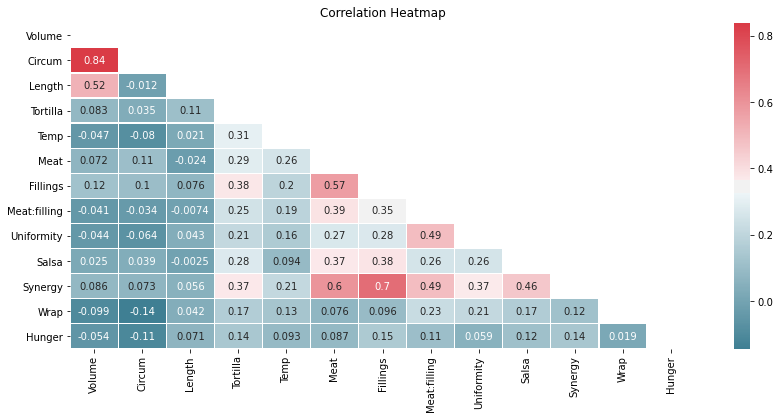

In [141]:
plt.figure(figsize=(14,6))

corr = df_to_analyze.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(corr, mask=mask, cmap = cmap, linewidths= 0.25, annot=True)
ax = ax.set_title('Correlation Heatmap')


##### The most important features that affect the Synergy are : 
* Fillings (0.7)
* Meat (0.6)
* Meat:filligs (0.49)
* Salsa (0.46)

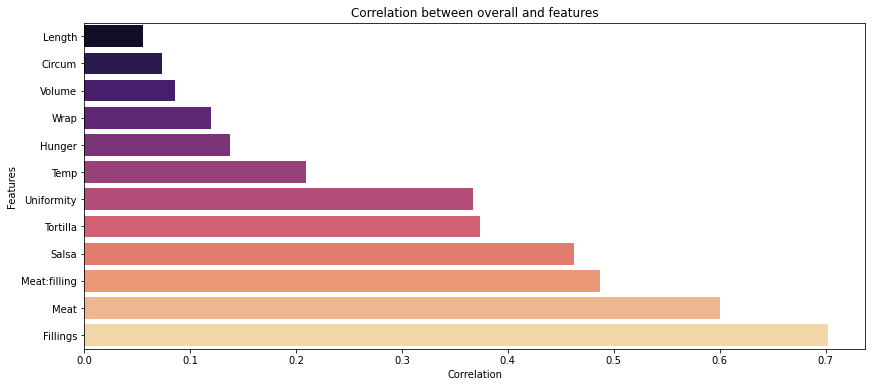

In [142]:
plt.figure(figsize=(14,6))

corr = df_to_analyze.corr()['Synergy'].reset_index()
corr = corr.sort_values(by = 'Synergy')[:(len(corr)-1)]
ax = sns.barplot(y = corr['index'], x = corr['Synergy'], palette='magma')
ax.set_xlabel('Correlation')
ax.set_ylabel('Features')
ax = ax.set_title('Correlation between overall and features')


### 5. Compare platforms ratings (Google/Yelp) to reviwers ratings 

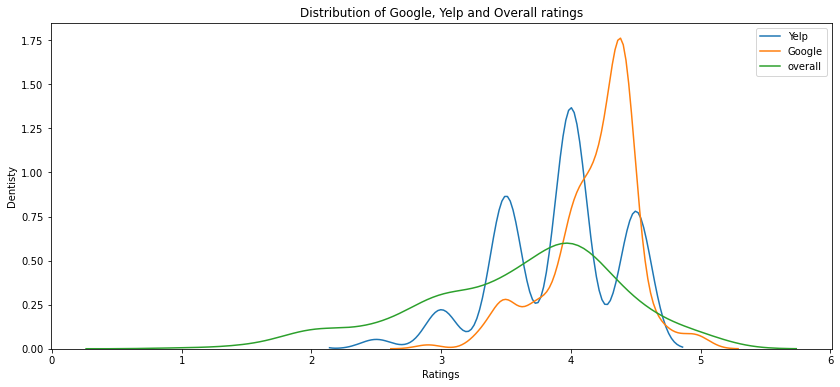

In [143]:
plt.figure(figsize=(14,6))
plt.title('Distribution of Google, Yelp and Overall ratings')
plt.xlabel('Ratings')
plt.ylabel('Dentisty')

sns.kdeplot(data=df['Yelp'])
sns.kdeplot(data=df['Google'])
sns.kdeplot(data=df['overall'])


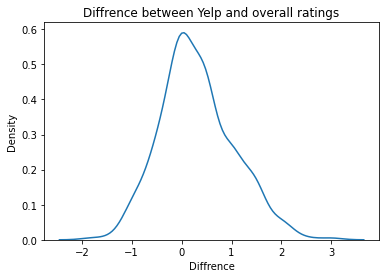

In [144]:
ax = sns.kdeplot(data=df['Yelp']-df['overall'])
ax.set_ylabel('Density')
ax.set_xlabel('Diffrence')
ax = ax.set_title('Diffrence between Yelp and overall ratings')


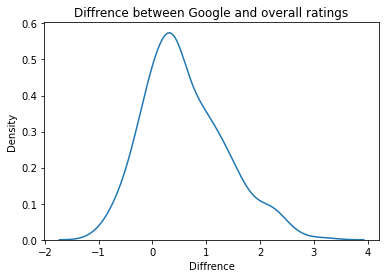

In [145]:
ax = sns.kdeplot(data=df['Google']-df['overall'])
ax.set_ylabel('Density')
ax.set_xlabel('Diffrence')
ax = ax.set_title('Diffrence between Google and overall ratings')


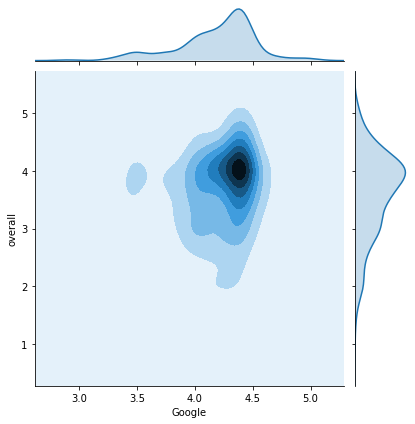

In [146]:
sns.jointplot(x=df['Google'], y=df['overall'], kind="kde")


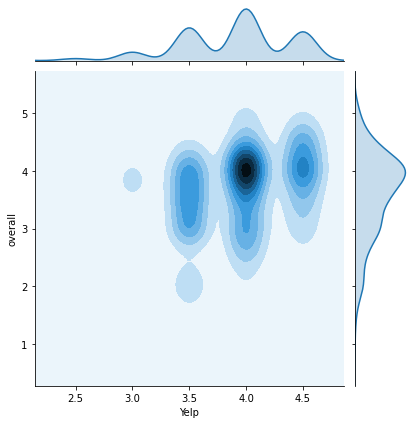

In [147]:
sns.jointplot(x=df['Yelp'], y=df['overall'], kind="kde")



#### 6. Determine if Google/Yelp ratings and Cost influence the number of Reviwers.
###### Features to analyse : 

* Google
* Yelp
* Cost
* Number of Reviwers


In [148]:
df_to_analyze = df.groupby('Location').mean()[['Google', 'Yelp', 'Cost','Rec']]
df_to_analyze['Reviwers'] = df.groupby('Location').size().reset_index(name = 'Reviwers')['Reviwers'].values
# df_to_analyze

#### Location with missing Google/Yelp ratings have only one Reviwer !

In [150]:
df_to_analyze[df_to_analyze['Google'].isnull()]

,Google,Yelp,Cost,Rec,Reviwers
Location,,,,,
"alberto's 623 n escondido blvd, escondido, ca 92025",NaN,NaN,4.59000,1.0,1
burrito box,NaN,NaN,11.50000,NaN,1
chili peppers,NaN,NaN,9.43000,1.0,1
colima's,NaN,NaN,8.25000,1.0,1
humbertos,NaN,NaN,6.00000,1.0,1
lolita's,NaN,NaN,7.04828,1.0,1
mxn on washington,NaN,NaN,2.99000,1.0,1
pedro's tacos,NaN,NaN,6.50000,1.0,1
"qdoba mexican grill, seatac airport",NaN,NaN,9.50000,NaN,1


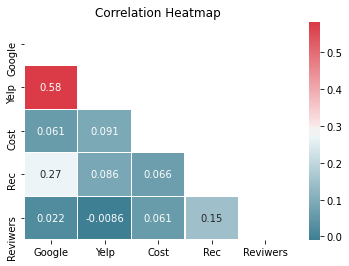

In [151]:
corr = df_to_analyze.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(corr, mask=mask, cmap = cmap, linewidths= 0.25, annot=True)
ax = ax.set_title('Correlation Heatmap')


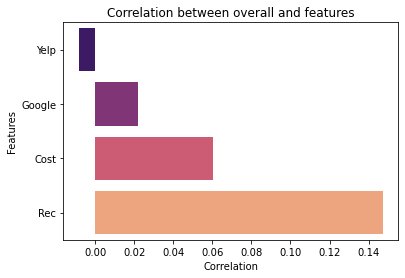

In [152]:
corr = df_to_analyze.corr()['Reviwers'].reset_index()
corr = corr.sort_values(by = 'Reviwers')[:(len(corr)-1)]
ax = sns.barplot(y = corr['index'], x = corr['Reviwers'], palette='magma')
ax.set_xlabel('Correlation')
ax.set_ylabel('Features')
ax = ax.set_title('Correlation between overall and features')